In [3]:
import ephem
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
hawaii = ephem.Observer()
hawaii.lon = ephem.degrees('205.')
hawaii.lat = ephem.degrees('19.')
hawaii.date = '2016/9/15 00:00:00'
hawaii

<ephem.Observer date='2016/9/15 00:00:00' epoch='2000/1/1 12:00:00' lon='205:00:00.0' lat='19:00:00.0' elevation=0.0m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>

In [5]:
eor0 = ephem.FixedBody()
eor0._ra = ephem.degrees('0.')
eor0._dec = ephem.degrees('-30.')
sun = ephem.Sun()
moon = ephem.Moon()

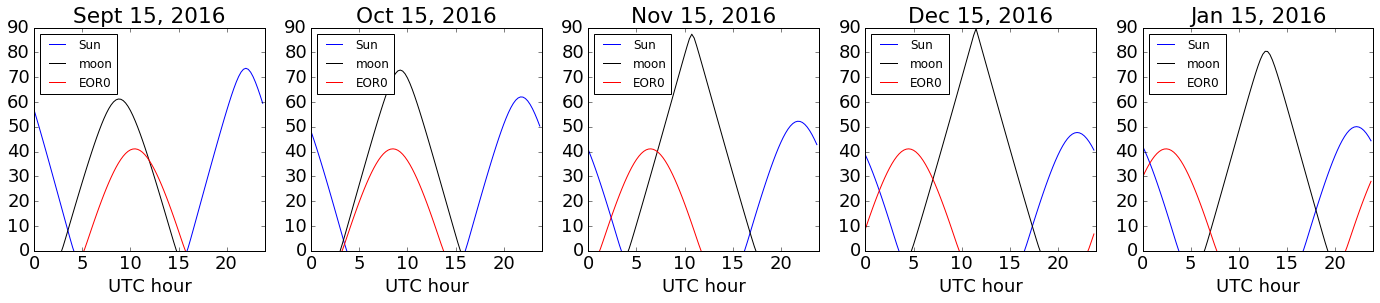

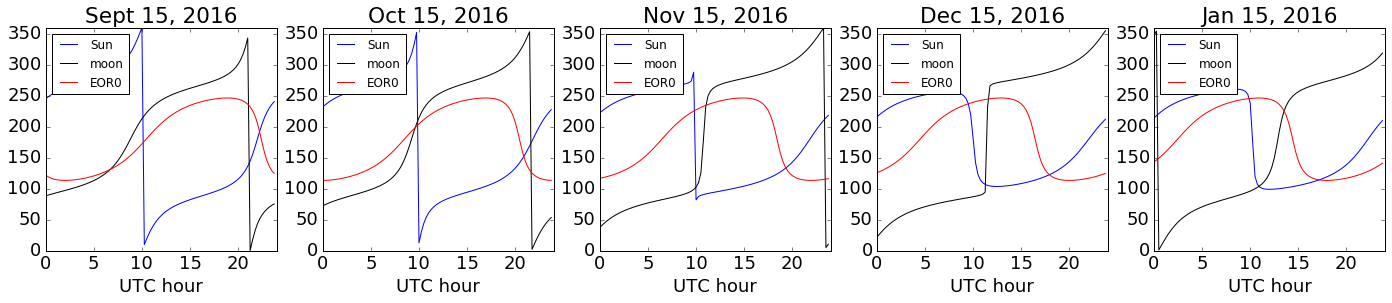

In [19]:
num_samples_per_hour = 4
num_times = 24*num_samples_per_hour
sun_alts = np.zeros(num_times)
moon_alts = np.zeros(num_times)
eor0_alts = np.zeros(num_times)

sun_azs = np.zeros(num_times)
moon_azs = np.zeros(num_times)
eor0_azs = np.zeros(num_times)

matplotlib.rcParams.update({'font.size': 18})
plt.figure(1,figsize=(24,4))
plt.figure(2,figsize=(24,4))
date_strs = ['2016/9/15 00:00:00','2016/10/15 00:00:00','2016/11/15 00:00:00','2016/12/15 00:00:00','2017/1/15 00:00:00']
date_names = ['Sept 15, 2016','Oct 15, 2016','Nov 15, 2016','Dec 15, 2016','Jan 15, 2016']
num_dates = len(date_strs)

for di in range(num_dates):
    hawaii.date = ephem.Date(date_strs[di])
    for ti in range(num_times):
        hawaii.date = ephem.date(hawaii.date + 1.*ephem.hour/num_samples_per_hour)
        eor0.compute(hawaii)
        moon.compute(hawaii)
        sun.compute(hawaii)

        eor0_alts[ti] = eor0.alt
        moon_alts[ti] = moon.alt
        sun_alts[ti] = sun.alt
        
        eor0_azs[ti] = eor0.az
        moon_azs[ti] = moon.az
        sun_azs[ti] = sun.az

    plt.figure(1)
    plt.subplot(1,num_dates,di+1)
    plt.plot(np.arange(num_times,dtype=float)/num_samples_per_hour,sun_alts*180./np.pi,'b')
    plt.plot(np.arange(num_times,dtype=float)/num_samples_per_hour,moon_alts*180./np.pi,'k')
    plt.plot(np.arange(num_times,dtype=float)/num_samples_per_hour,eor0_alts*180./np.pi,'r')
    plt.ylim([0,90])
    plt.xlim([0,24])
    plt.title(date_names[di])
    plt.xlabel('UTC hour')
    plt.legend(['Sun','moon','EOR0'],fontsize=12,loc=2)
    
    plt.figure(2)
    plt.subplot(1,num_dates,di+1)
    plt.plot(np.arange(num_times,dtype=float)/num_samples_per_hour,sun_azs*180./np.pi,'b')
    plt.plot(np.arange(num_times,dtype=float)/num_samples_per_hour,moon_azs*180./np.pi,'k')
    plt.plot(np.arange(num_times,dtype=float)/num_samples_per_hour,eor0_azs*180./np.pi,'r')
    plt.ylim([0,360])
    plt.xlim([0,24])
    plt.title(date_names[di])
    plt.xlabel('UTC hour')
    plt.legend(['Sun','moon','EOR0'],fontsize=12,loc=2)

plt.savefig('EOR0_field_observation_by_month.png',bbox_inches='tight')